In [73]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [74]:
data = pd.read_csv("Titanic-Dataset.csv")
data = data.drop(columns=["Name", "Ticket", "Cabin"])
data = data.dropna()
data["Sex"] = data["Sex"].apply(lambda x: 0 if x == "male" else 1)
embarkation_codes = {"C":0, "Q":1, "S":2}
data["Embarked"] = data["Embarked"].apply(lambda x: embarkation_codes.get(x, 3))
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
885,886,0,3,1,39.0,0,5,29.1250,1
886,887,0,2,0,27.0,0,0,13.0000,2
887,888,1,1,1,19.0,0,0,30.0000,2
889,890,1,1,0,26.0,0,0,30.0000,0


## First Check for Correlations between each column and survived


<Axes: >

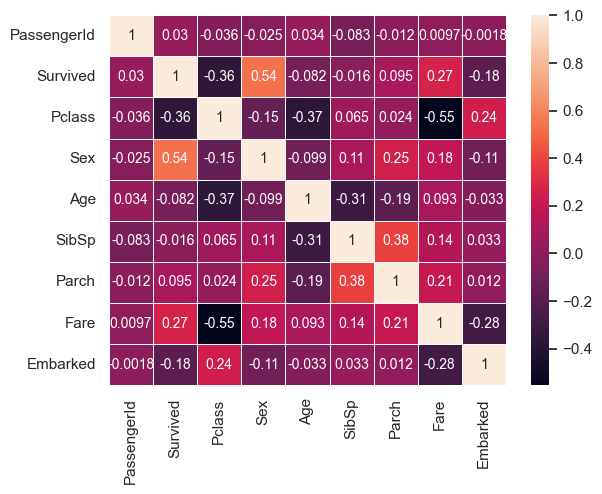

In [75]:
sns.heatmap(data.corr(), linewidths=0.5, annot=True, annot_kws={"size": 10})

## Plot 2 Dimensional PCA 
???

/var/folders/q7/6y138xkd6zv6br9n2kwjwbm40000gn/T/ipykernel_18313/3532982182.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


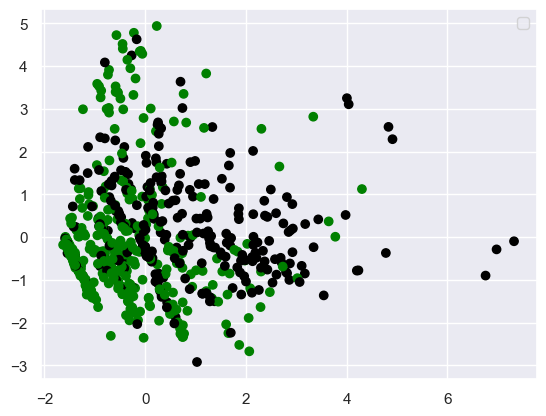

In [83]:
pca = PCA(2)
features = data.drop("Survived", axis=1).to_numpy()
scaler= StandardScaler()
scaled_features = scaler.fit_transform(features)
x, y = pca.fit_transform(scaled_features).T
plt.scatter(x,y, c=["black" if i else "green" for i in data["Survived"]])
plt.legend()

PearsonRResult(statistic=0.31811686186479093, pvalue=3.3035849577636182e-18)


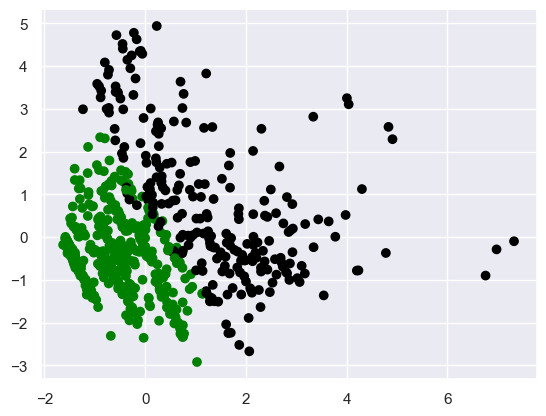

In [84]:
kmeans = KMeans(2)
pred = kmeans.fit_predict(scaled_features)
print(pearsonr(pred, data["Survived"]))
plt.scatter(x, y, c=["black" if i else "green" for i in pred])